In [43]:
%matplotlib inline

In [44]:
from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [45]:
#Description of features
#Average[3]: Average acceleration (for each axis)
#Standard Deviation[3]: Standard deviation (for each axis)
#Average Absolute Difference[3]: Average absolute
#difference between the value of each of the 200 readings
#within the ED and the mean value over those 200 values
#(for each axis)
#Average Resultant Acceleration[1]: Average of the square
#roots of the sum of the values of each axis squared
#over the ED
#Time Between Peaks[3]: Time in milliseconds between
#peaks in the sinusoidal waves associated with most
#activities (for each axis)
#Binned Distribution[30]: We determine the range of values
#for each axis (maximum – minimum), divide this range into
#10 equal sized bins, and then record what fraction of the
#200 values fell within each of the bins. 

In [46]:
my_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile.csv")
df = pd.read_csv(my_file)
df.head()
df.shape#(no of rows, no of columns)

(417, 46)

In [47]:
df_unique = df.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape

(406, 46)

In [48]:
X = df_unique.values[:,2:45]

In [49]:
Y = df_unique.values[:,45]

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [51]:
df_gini = DecisionTreeClassifier(criterion = 'gini')

In [52]:
df_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
feature_imp = df_gini.feature_importances_

In [54]:
main_features = []
for i in range(0,len(feature_imp)):
    if feature_imp[i] > 0:
        entry = []
        entry.append(df.columns.values[i+2])
        entry.append(feature_imp[i])
        main_features.append(entry)
main_features

[['Bin2,x', 0.014124747145460347],
 ['Bin10,x', 0.04021722275547264],
 ['TimeDiffPeaks-z', 0.10575756055970709],
 ['AvgAbsDiff-x', 0.037885619165666143],
 ['AvgAbsDiff-y', 0.77429141337218865],
 ['AvgAcc-x', 0.013768058240612375],
 ['AvgAcc-y', 0.013955378760892704]]

In [55]:
frame = df_unique.loc[:,['AvgAbsDiff-y','AvgAbsDiff-x']]

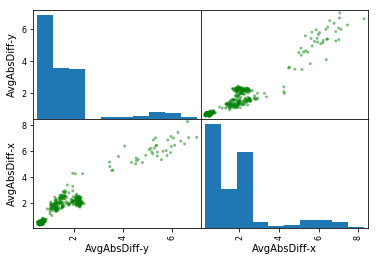

In [56]:
scatter_matrix(frame,color='g')
plt.savefig('./Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_train_val_same_3.png',dpi=1000)

In [57]:
#Predicting using test data
Y_predict_gini = df_gini.predict(X_test)

In [58]:
#Calculating accuracy score
score = accuracy_score(Y_test,Y_predict_gini)
score

0.97540983606557374

In [59]:
cm = confusion_matrix(Y_test,Y_predict_gini)
cm

array([[48,  1],
       [ 2, 71]])